確率質量関数の実装

In [2]:
from scipy.special import comb
import math


def ensemble_error(n_classifier, error):
    k_start = int(math.ceil(n_classifier / 2.))
    probs = [comb(n_classifier, k) * error ** k * (1 - error) ** (n_classifier - k)
             for k in range(k_start, n_classifier + 1)]
    return sum(probs)


ensemble_error(n_classifier=11, error=0.25)

0.03432750701904297

アンサンブル分類器をベース分類器と比較

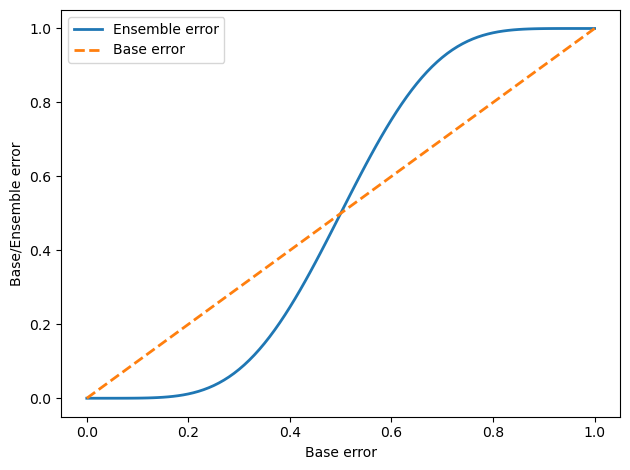

In [3]:
import numpy as np
import matplotlib.pyplot as plt

error_range = np.arange(0.0, 1.01, 0.01)
ens_errors = [ensemble_error(n_classifier=11, error=error) for error in error_range]

plt.plot(error_range, ens_errors, label='Ensemble error', linewidth=2)
plt.plot(error_range, error_range, label='Base error', linewidth=2, linestyle='--')
plt.xlabel('Base error')
plt.ylabel('Base/Ensemble error')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()